In [1]:
# BLOCO 1: CONFIGURAÇÕES DO PROGRAMA

## IMPORTS PARA O FUNCIONAMENTO DO PROGRAMA
import random as rd
import numpy as np
try:
    import matplotlib.pyplot as plt
except:
    print('Erro ao importar biblioteca  "matplotlib.pyplot"!')
    
## VARIÁVEIS GLOBAIS QUE DITAM O COMPORTAMENTO DA POPULAÇÃO
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.05
TAMANHO_POP=8                                                                           #tamanho da população
NUMERO_DE_OBJETOS = 8                                                                   #número de objetos disponiveis
CAPACIDADE_DA_MOCHILA = 35                                                              #peso máximo da mochila
PROPRIEDADES = [[10,5],[18,8],[12,7],[14,6],[13,9],[11,5],[8,4],[6,3]]                  #lista contendo o peso acompanhado do valor de cada objeto 

In [2]:
# BLOCO 2: FUNÇÃO PARA CRIAR A POPULAÇÃO

def criaPop(tamanho=TAMANHO_POP, num = NUMERO_DE_OBJETOS):
    pop = list()                                                #lista para armazenar a população
    individuo = list()                                          #lista para armazenar um individuo
    for c in range(0,tamanho):                                  #laço para gerar os N individuos da população
        for x in range(0,num):                                  #laço para gerar um individuo
            n = rd.randint(0,1)                                 #sorteia um valor de n
            individuo.append(n)                                 #adiciona esse valor a lista do inidividuo
        pop.append(individuo[:])                                #adiciona na lista pop o individuo gerado   
        individuo.clear()                                       #limpa a lista do individuo e repete o processo
    return pop
            
    

In [3]:
# BLOCO 3: TESTE DA FUNÇÃO ACIMA

pop_teste = criaPop()
print(pop_teste)

[[0, 0, 0, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 1, 0, 1], [0, 1, 0, 0, 1, 0, 1, 0], [1, 1, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 1]]


In [4]:
# BLOCO 4: FUNÇÃO DE APTIDÃO DE UM INDIVÍDUO

def individualFitness(individuo, propriedades = PROPRIEDADES, cap = CAPACIDADE_DA_MOCHILA):
    ## descobrindo o rho
    rho_possivel = list()                                           #lista para armazenar os possiveis rhos 
    beneficio = peso_total = 0                                      #beneficio e peso total da solução candidata
    for c in propriedades:                                          
        rho_possivel.append(c[1]/c[0])                              #armazena todos os rhos possiveis
    rho = max(rho_possivel)                                         #descobre o rho
    
    ## verificando o indivíduo
    for c in range(0,NUMERO_DE_OBJETOS):                            #laço para analisar o individuo
        if individuo[c] == 1:                                       #verifica se ele contem o objeto
            beneficio += propriedades[c][1]                         #incrementa o valor do beneficio
            peso_total += propriedades[c][0]                        #incremeta o valor do peso total
    if peso_total > cap:                                            #verifica se tem penalidade
        fitness = beneficio - rho*(peso_total-cap)                  #aplica penalidade, caso tenha
    else:
        fitness = beneficio                                         
    return fitness
    

In [5]:
# BLOCO 5: TESTE DA FUNÇÃO ACIMA

fitness = individualFitness([1, 0, 1, 0, 1, 0, 0, 0])
print(fitness)

21


In [6]:
# BLOCO 6: FUNÇÃO DE APTIDÃO DA POPULAÇÃO

def popFitness(pop):
    pop_fitness = list()                                        #lista para armazenar os fitness
    for individuo in pop:                                       #varre a população
        pop_fitness.append(individualFitness(individuo))        #armazena o fitness do individuo na lista
    return pop_fitness

In [7]:
# BLOCO 7: TESTE DA FUNÇÃO ACIMA

pop_fitness = popFitness(pop_teste)
print(pop_fitness)

[17.846153846153847, 10.23076923076923, 13.461538461538462, 19, 19.153846153846153, 18.23076923076923, 8.846153846153847, 8]


In [8]:
# BLOCO 8: MECANISMO DE SELEÇÃO DOS PAIS

def roletaPais(pop):
    pais = list()                                   #lista para armazenar os roletados
    porcentagens = list()                           #lista para armazenar as porcentagens de cada individuo
    pop_fitness = popFitness(pop)                   #armazena o fitness da população
    fitness_total = por = 0                         #variaveis para definir as porcentagens

    for fitness in pop_fitness:
        fitness_total += fitness                    #soma todos os fitness da população
    
    for fitness in pop_fitness:                     #varre todos os fitness da população
        por += (fitness/fitness_total)              #calcula a porcentagem do individuo
        porcentagens.append(por)                    #adiciona a porcentagem na lista
    
    for c in range(0,TAMANHO_POP):                  #laço para sortear os individuos
        n = rd.random()                             #roleta um numero
        for i in range(0,TAMANHO_POP):              #analisa qual individuo foi sorteado
            if n <= porcentagens[i]:
                pais.append(pop[i])                 
                break
    return pais


    

In [9]:
# BLOCO 9: TESTE DA FUNÇÃO ACIMA

pais_teste = roletaPais(pop_teste)
print(pais_teste)

[[0, 1, 0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0]]


In [10]:
# BLOCO 10: MECANISMO DE CRUZAMENTO

def cruzamento(pop, pais, crossover_rate=CROSSOVER_RATE):
    new_pop = list()                                                                    #cria uma lista com a nova população
    filho = list()                                                                      #cria uma lista para armazenar um filho
    for c in range(0,TAMANHO_POP,2):                                                    #laço para efetuar os cruzamentos entre os pais selecionados
        if rd.random() < crossover_rate:                                                    #verifica se tem cruzamento
            ponto_de_corte = rd.randint(1,NUMERO_DE_OBJETOS-1)                                  #define o ponto de corte
            for i in range(0,ponto_de_corte):                                                   #coloca a identidade do pai 1 no filho 1 do inicio ao ponto de corte
                filho.append(pais[c][i])
            for i in range(ponto_de_corte,NUMERO_DE_OBJETOS):                                   #coloca a identidade do pai 2 no filho 1 do ponto de corte ao final
                filho.append(pais[c+1][i])      
            new_pop.append(filho[:])                                                            #adiciona o filho gerado na nova população
            filho.clear()                                                                       #limpa a lista filho
            for i in range(0,ponto_de_corte):                                                   #coloca a identidade do pai 2 no filho 2 do inicio ao ponto de corte
                filho.append(pais[c+1][i])
            for i in range(ponto_de_corte,NUMERO_DE_OBJETOS):                                   #coloca a identidade do pai 1 no filho 2 do ponto de corte ao final
                filho.append(pais[c][i])                                                        
            new_pop.append(filho[:])                                                            #adiciona o filho gerado na nova população
            filho.clear()                                                                       #limpa a lista filho
        else:                                                                               #caso não tenha cruzamento, coloca na nova população os individuos que já estavam nessa posição na antiga população
            new_pop.append(pop[c])
            new_pop.append(pop[c+1])
    return new_pop

In [11]:
# BLOCO 11: TESTE DA FUNÇÃO ACIMA

pop_teste = cruzamento(pop_teste,pais_teste)
print(pop_teste)

[[0, 1, 0, 0, 1, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 0, 1, 0], [0, 1, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 1, 0, 0, 1]]


In [12]:
# BLOCO 12: MECANISMO DE MUTAÇÃO

def mutation(pop, mutation_rate=MUTATION_RATE):
    nova_pop = list()                                           #lista para a população com mutação
    for individuo in pop:                                       #varre a população sem mutação
        if(rd.random() < mutation_rate):                        #verifica se o individuo será mutado
            bit_flip = rd.randint(0,NUMERO_DE_OBJETOS-1)        #define em qual posição acontecerá a mutação
            if individuo[bit_flip] == 0:                        
                individuo[bit_flip] = 1                         #inverte o bit do individuo
            else:
                individuo[bit_flip] = 0                         #inverte o bit do individuo
            nova_pop.append(individuo)                          #adiciona o individuo na nova população
        else:
            nova_pop.append(individuo)                          #caso não tenha mutação, adiciona o individuo sem alterações na nova população 
    return nova_pop

In [13]:
# BLOCO 13: TESTE DA FUNÇÃO ACIMA

pop_teste = mutation(pop_teste)
print(pop_teste)

[[0, 1, 0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 0, 1, 0], [0, 1, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 1, 0, 0, 1]]


In [14]:
# BLOCO 14: FUNÇÃO DE COLETA DE DADOS PARA O GRÁFICO

def coletaDados(bests, bests_medio, geracoes, pop_fitness, geracao_atual):
    bests.append(max(pop_fitness))                                                  #adiciona o melhor individuo na lista dos melhores
    geracoes.append(geracao_atual)                                                  #adiciona a geração atual na lista de gerações
    media = 0                                                                       
    for c in pop_fitness:
        media += c                                                                  #soma todos os fitness da geração atual
    media = media/len(pop_fitness)                                                  #calcula a media dos fitness
    bests_medio.append(media)                                                       #adiciona a media dos fitness na lista

In [15]:
# BLOCO 15: FUNÇÃO GRÁFICA

try: 
    def grafico(x,y,x_title, y_title,title):
        figura = plt.figure(figsize=(20,4))                         #cria gráfico vazio
        figura.add_subplot(131)                                     #define o espaço em que o gráfico sera plotado
        plt.plot(x,y)                                               #plota o gráfico com as duas listas
        plt.xlabel(x_title)                                         #nomeia o eixo x
        plt.ylabel(y_title)                                         #nomeia o eixo y
        plt.title(title)                                            #nomeia o titulo
        plt.show()                                                  #mostra o gráfico
except:
    print('Erro ao criar função gráfica"!')

In [16]:
# BLOCO 16: DESCOBRINDO O MELHOR INDIVÍDUO POSSIVEL PARA A CONDIÇÃO DE PARADA
import numpy as np
import itertools

todos_individuos = [np.reshape(np.array(i), (NUMERO_DE_OBJETOS, 1)) for i in itertools.product([0, 1], repeat = NUMERO_DE_OBJETOS)]             #cria uma lista com todos os individuos possiveis
todos_fitness = popFitness(todos_individuos)                                                                                                    #lista com todos os fitness possiveis
GABARITO = (max(todos_fitness))                                                                                                                 #melhor individuo possivel com base nas propriedades  
print(GABARITO)

21


Melhor indivíduo inicial: [1, 0, 1, 0, 1, 1, 0, 0]; Fitness: 18.385
Numero de gerações: 18
Melhor indivíduo final: [1, 0, 1, 0, 1, 0, 0, 0]; Fitness: 21.000


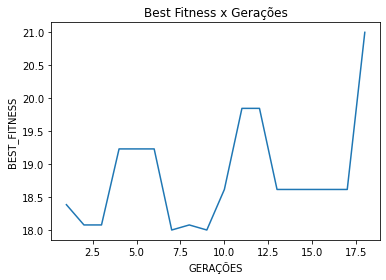

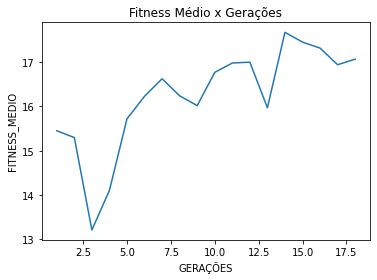

In [17]:
# BLOCO 17: ALGORITMO GENÉTICO COMPLETO

## listas de informações para os gráficos
bests = list()
bests_medio = list()
geracoes = list()

## inicialização da população
pop = criaPop()                                                                     #cria a população inicial
pop_fitness = popFitness(pop)                                                       #analisa o fitness da população
best = max(pop_fitness)                                                             #descobre o melhor fitness da população inicial
pos_best = pop_fitness.index(best)                                                  #descobre a posição do melhor individuo
i = 1                                                                               #contador de gerações
coletaDados(bests, bests_medio, geracoes, pop_fitness, i)                           #coleta dados para o gráfico
print(f'Melhor indivíduo inicial: {pop[pos_best]}; Fitness: {best:.3f}')

## GGA
while best !=GABARITO:                                                              #condição de parada: achar o individuo perfeito
    pais = roletaPais(pop)                                                          #escolhe os pais da geração
    pop = cruzamento(pop,pais)                                                      #cruza os pais e substitui a população
    pop = mutation(pop)                                                             #aplica a mutação
    pop_fitness = popFitness(pop)                                                   #analisa o fitness da nova população
    best = max(pop_fitness)                                                         #descobre o melhor individuo da nova geração
    i += 1                                                                          #incrementa o contador de gerações
    coletaDados(bests, bests_medio, geracoes, pop_fitness, i)                       #coleta dados para o gráfico

## informações finais
pos_best = pop_fitness.index(best)                                                  #descobre a posição do melhor individuo
print(f'Numero de gerações: {i}')                                              
print(f'Melhor indivíduo final: {pop[pos_best]}; Fitness: {best:.3f}')
try:
    grafico(geracoes,bests, 'GERAÇÕES', 'BEST_FITNESS', 'Best Fitness x Gerações')
    grafico(geracoes,bests_medio, 'GERAÇÕES', 'FITNESS_MEDIO', 'Fitness Médio x Gerações')
except:
    print('Erro ao gerar gráfico!')
    

# **RELATÓRIO KNAPSACK PROBLEM**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# _*INTRODUÇÃO*_: 
O Knapsack Problem é um problema de optimização combinatória. Nele precisamos preencher uma mochila com objetos de diferentes pesos e valores. O objetivo é alcançar o maior valor possível, de modo que não ultrapasse a capacidade máxima da mochila. Idealmente, usaremos uma mochila com capacidade para 8 objetos e com capacidade máxima de 35 unidades de peso. Os objetos disponíveis possuem as seguintes propriedades:
 Objeto | Peso | Valor
 :---:|:---:|:---:
1 | 10u | 5
2 | 18u | 8
3 | 12u | 7
4 | 14u | 6
5 | 13u | 9
6 | 11u | 5
7 | 8u | 4
8 | 6u | 3
---
# *_IMPLEMENTAÇÃO_*: 
### <ins>Representação escolhida:</ins>
Um indivíduo é representado por uma lista de 8 elementos (o tamanho pode ser mudado no código),  que possuem valor 0 ou 1. O algoritmo preenche aleatoriamente o valor de cada elemento. O 1 indica que o indivíduo possui o objeto associado àquela posição, enquanto o 0 indica o contrário. 

Exemplo: [1,1,1,1,1,1,1,0]
	
Neste caso, o indivíduo possui todos os objetos disponíveis, menos o último.
	
Já a população é representada por uma lista contendo 8 indivíduos (o tamanho desta lista também pode ser alterado no código), chamada `pop`. Para mais detalhes olhar os <span style="color:green">*[BLOCOS 1 e 2]*</span>. 

### <ins>Função de Aptidão:</ins>
A função de aptidão define a qualidade de uma solução candidata. Neste caso o benefício é uma relação entre o valor que os objetos renderam ao indivíduo com o seu peso total. Não é muito benéfico um indivíduo possuir todos os objetos pois assim ele ultrapassará a capacidade da mochila, e consequentemente, receberá uma penalidade. A avaliação da qualidade de uma solução candidata é dada pela seguinte fórmula: 

<img src=img/Formula.png alt="Formula" width="550"/>

Portanto, foi feita uma função que atendesse a fórmula acima para analisar o fitness de um indivíduo. O processo foi feito em todos os indivíduos da população e o resultado foi armazenado em uma lista chama `pop_fitness`. Para mais detalhes olhar os blocos <span style="color:green">*[BLOCOS 4 e 6]*</span>.

### <ins>Mecanismos de Seleção dos Pais:</ins>

Os pais são selecionados através do método da Roleta, que consiste em primeiro calcular-se o fitness total da população atual. Depois calcula-se a porcentagem que o fitness de cada indivíduo representa deste total e os indivíduos são mapeados para segmentos de reta contidos no intervalo [0,1]. Então, a partir destas porcentagens, um número aleatório "r" é sorteado e o indivíduo cujo segmento contém "r" é então selecionado para ser um pai. Repete-se este processo "n" vezes para "n" indivíduos na população.

Para mais informações olhar o <span style="color:green">*[BLOCO 8]*</span>.

### <ins>Operador de Cruzamento:</ins>

Primeiro é observado se haverá cruzamento ou não através da geração de um número aleatório que será comparado se é menor ou maior do que o "crossover_rate". Caso seja menor ocorrerá então o cruzamento, que consiste em primeiro gerar um ponto de corte aleatório que ditará como ocorrerá a troca de informações. Sendo que, o primeirofilho terá a primeira do início até o ponto de corte igual ao pai 1 e o resto igual ao pai 2, enquanto o contrário ocorrerá com o filho 2.  

Para mais informações olhar o <span style="color:green">*[BLOCO 10]*</span>.


### <ins>Operador de Mutação:</ins>

Este método consiste em primeiro analisar se terá mutação naquele indivíduo e, após isto ocorre a mutação, do tipo bit-flip, no qual uma posição aleatória do elemento é selecionada e o conteúdo dela é invertido, seno que se ele era '0' vai para '1' e se era '1' vai para '0'.

Caso não ocorra mutação o próprio filho é colocado na população.

Para mais informações olhar o <span style="color:green">*[BLOCO 12]*</span>.

### <ins>Mecanismo de Seleção de Sobreviventes:</ins>

Como estamos tratando de um GGA, toda a população é substituiída pelos seus descendentes.

Para mais informações olhar o <span style="color:green">*[BLOCO 12]*</span>. No qual colocamos os filhos na nova população.

### <ins>Gráficos:</ins>

Ao final do programa, é gerado um gráfico informativo do melhor fitness ao longo das gerações e da média do fitness da população de modo geral. Para que ele funcione é necessário instalar e importar a biblioteca matpltlib.pyplot. Qualquer erro na importação dessa biblioteca não compromete o funcionamento do código, apenas não serão mostrados os gráficos ao final do programa. O programa conta com uma função que coleta dados do melhor fitness e da média de fitness da população ao longo das gerações e os coloca em listas separadas. Essas listas são usadas para plotar os gráficos. Para mais detalhes olhar os blocos <span style="color:green">*[BLOCOS 14 e 15]*</span>.

### <ins>Testes:</ins>

Todas as funções importantes para o funcionamento do programa tem seus testes implementados no bloco subsequente. Olhar os <span style="color:green">*[BLOCOS 3, 5, 7, 9, 11 e 13]*</span>.

### <ins>Condição de Parada:</ins>

O algoritmo só termina quando encontra a solução perfeita. A solução perfeita é encontrada no bloco  16. Nele criamos uma lista com todos os indivíduos possíveis e analisamos qual tinha o maior fitness.

### <ins>Código Principal:</ins>

Olhar <span style="color:green">*[BLOCO 17]*</span>.

# _*ANÁLISE DOS RESULTADOS*_: 

### <ins>Crossover Rate:</ins>

Para testarmos a implicancia de mudanças na taxa do crossover_rate no número de gerações necessárias para chegar ao gabarito decidimos simular o código 100 vezes para duas taxas de crossover diferentes (0.65 e 1). Obtendo assim os gráficos abaixo:


<img src=img/Image2.png alt="CrossoverRate = 0.65" width="550"/>



<img src=img/Image3.png alt="CrossoverRate = 1" width="550"/>


Como podemos ver ambos os gráficos possuem um comportamento bem semelhante, sendo que nos dois casos é possível ver que o gráfico decresce exponencialmente, tendo bem mais casos em que a resposta do problema foi encontrada rapidamente, e em raras vezes a execução se estende para mais gerações. Dado que até a média de ambos foi bem próxima, visto que para crossover_rate = 0,65 foi obtida uma média de 387,88 gerações necessárias e uma média igual a 295,24 para crossover_rate = 1.

Simulando 100 vezes o programa, para cada Crossover Rate em um intervalo de 0.05, chegamos ao seguinte gráfico:


<img src=img/Image1.png alt="CrossoverRate" width="550"/>


Conclui-se então que a mudança no valor do crossover_rate não implica uma grande diferença no número médio de gerações necessárias para que seja solucionado o problema. Visto que a diferença entre a maior média encontrada (463,84) e a menor (379,38) é de apenas 84,46, uma diferença que é explicada pelo fato de uma simulação ter dado mais “sorte” do que as outras. E, provavelmente, caso tentássemos tais taxas outras vezes, as médias delas manteriam-se próximas deste alcance.

### <ins>Mutation Rate:</ins>

Para testarmos a implicancia de mudanças na taxa do mutation_rate no número de gerações necessárias para chegar ao gabarito decidimos simular o código 100 vezes para duas taxas de crossover diferentes (0.02 e 0.1). Obtendo assim os gráficos abaixo:


<img src=img/Image7.png alt="MutationRate = 0.02" width="550"/>


<img src=img/Image10.png alt="MutationRate = 0.1" width="550"/>


É possível observar que no primeiro gráfico (mutation_rate = 0,02) a frequência de gerações se concentra abaixo das 2000, com uma maioria entre 0 e 250, 25 casos, e alguns outros maiores, chegando até um máximo de 7412. Assim, sua média foi igual a 1478,73.

Já para no segundo diagrama (mutation_rate = 0,1) quase todas as simulações, 77, se mantiveram entre 0 e 250, sendo que em raros casos passou desse alcance e o maior número de gerações necessárias foi “apenas” 874. Finalizando com uma média de 174,16.

Portanto, vemos que uma mudança no valor do mutation_rate causa uma grande variação no número médio de gerações necessárias para encontrar a solução do problema. Para analisarmos isso com mais clareza simulamos 100 vezes o programa, para cada mutation_rate entre 0,02 e 0,1, com intervalo de 0,01, chegando ao seguinte gráfico:


<img src=img/Image4.png alt="MutationRate" width="550"/>


Conclui-se que quanto maior a taxa de mutação, menos gerações são necessárias para solucionar o exercício, sendo que é possível perceber que isso ocorre de forma exponencial. Isso se deve, pois a mutação neste caso ocorre apenas em um caractere e ocorre da forma bit flip, ou seja, trocando ‘0’ para ‘1’ ou ‘1’ para ‘0’, assim, ela é necessária e serve de grande ajuda para diversificar um pouco a população e consequentemente encontrar a solução de forma mais rápida.  

### <ins>Considerações Finais:</ins>

- Comportamento das simulações: 

<img src=img/Simulacoes.png alt="Simulação" width="550"/>


- Pode-se notar que o Best Fitness de uma simulação oscila bastante ao longo das gerações. Isso acontece pois estamos tratando de um GGA. Como a geração nova não preserva nenhum indivíduo da geração antiga, não temos como garantir que a nova população seja melhor ou pelo menos igual a anterior. O mesmo acontece com o fitness médio da geração. Entretanto, esse método é muito semelhante a vida real, visto que um indivíduo não se perpetua ao longo de várias gerações.

- Após toda essa pesquisa, percebe-se que o algoritmo mais eficiente não depende do valor de crossover_rate escolhido, podendo ser qualquer um maior do que 0,6, já o mutation_rate = 0,1 foi o mais eficiente.

